# sma

In [38]:
import pandas as pd
import talib
import numpy as np

input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")


input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values
input_data["SMA Weekly"] = talib.SMA(close_price_data, timeperiod=5)

input_data.to_csv("SMA_Values.csv", index=False)
latest_sma = input_data["SMA Weekly"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

print("Current Price:\n", latest_close_price)
print("Total SMA Entries:\n", len(latest_sma))

def find_support_and_resistance(df, price_column="SMA Weekly", window=5):
    support = []
    resistance = []
    
    df_filtered = df.dropna(subset=[price_column])  
    prices = df_filtered[price_column].values
    dates = df_filtered["Date"].values 

    for i in range(window, len(prices) - window):
        high_range = prices[i - window:i + window]
        low_range = prices[i - window:i + window]
        current_price = prices[i]

        if current_price == max(high_range):
            resistance.append((dates[i], current_price))  
        elif current_price == min(low_range):
            support.append((dates[i], current_price)) 

    return support, resistance

support, resistance = find_support_and_resistance(input_data)

print("Support Levels:")
for date, price in support:
    date = pd.Timestamp(date)
    print(f"Date: {date.strftime('%Y-%m-%d')}, SMA: {price}")

print("Resistance Levels:")
for date, price in resistance:
    date = pd.Timestamp(date)
    print(f"Date: {date.strftime('%Y-%m-%d')}, SMA: {price}")


Current Price:
 1233.0
Total SMA Entries:
 125
Support Levels:
Date: 2024-09-12, SMA: 2928.04
Date: 2024-11-21, SMA: 1249.0099999999989
Date: 2025-01-01, SMA: 1216.999999999999
Date: 2025-01-30, SMA: 1239.7199999999991
Resistance Levels:
Date: 2024-09-04, SMA: 3028.1899999999996
Date: 2024-09-27, SMA: 3000.33
Date: 2024-12-06, SMA: 1314.9999999999989
Date: 2025-01-22, SMA: 1285.0099999999989
Date: 2025-02-10, SMA: 1273.059999999999


# ema

In [45]:
import pandas as pd
import talib
import numpy as np


input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values
input_data["EMA_10"] = talib.EMA(close_price_data, timeperiod=10)
input_data.to_csv("EMA_10 Values.csv")

latest_ema = input_data["EMA_10"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

print("Current Price:\n",latest_close_price)
print("Total Length:\n",latest_ema)

def find_support_and_resistance(prices, dates, window=5):
    support = []
    resistance = []
    for i in range(window, len(prices) - window):
        high_range = prices[i - window:i + window]
        low_range = prices[i - window:i + window]
        current_price = prices[i]
        if current_price == max(high_range):
            resistance.append((dates[i], current_price))
        elif current_price == min(low_range):
            support.append((dates[i], current_price))
    return support, resistance

ema_values = input_data["EMA_10"].dropna().values
dates = input_data["Date"].iloc[-len(ema_values):].values
support, resistance = find_support_and_resistance(ema_values, dates)

print("Support Levels:")
for date, price in support:
    date = pd.Timestamp(date) 
    print(f"Date: {date.strftime('%Y-%m-%d')} , EMA: {price:}")

print("Resistance Levels:")
for date, price in resistance:
    date = pd.Timestamp(date)
    print(f"Date: {date.strftime('%Y-%m-%d')} , EMA: {price:.2f}")


Current Price:
 1233.0
Total Length:
 119    3012.810000
118    3015.771818
117    3010.349669
116    2995.677002
115    2982.808456
          ...     
4      1239.705385
3      1237.013496
2      1234.901952
1      1233.547051
0      1233.447587
Name: EMA_10, Length: 120, dtype: float64
Support Levels:
Date: 2024-09-19 , EMA: 2946.3183110549235
Date: 2024-11-29 , EMA: 1292.9638357807278
Date: 2025-01-01 , EMA: 1226.9316107207637
Date: 2025-01-29 , EMA: 1250.291856579886
Resistance Levels:
Date: 2024-09-27 , EMA: 2986.26
Date: 2024-12-06 , EMA: 1306.96
Date: 2025-01-22 , EMA: 1269.14
Date: 2025-02-07 , EMA: 1266.32


# ema graph

Current Price:
 1233.0
Total Length:
 119    3012.810000
118    3015.771818
117    3010.349669
116    2995.677002
115    2982.808456
          ...     
4      1239.705385
3      1237.013496
2      1234.901952
1      1233.547051
0      1233.447587
Name: EMA_10, Length: 120, dtype: float64


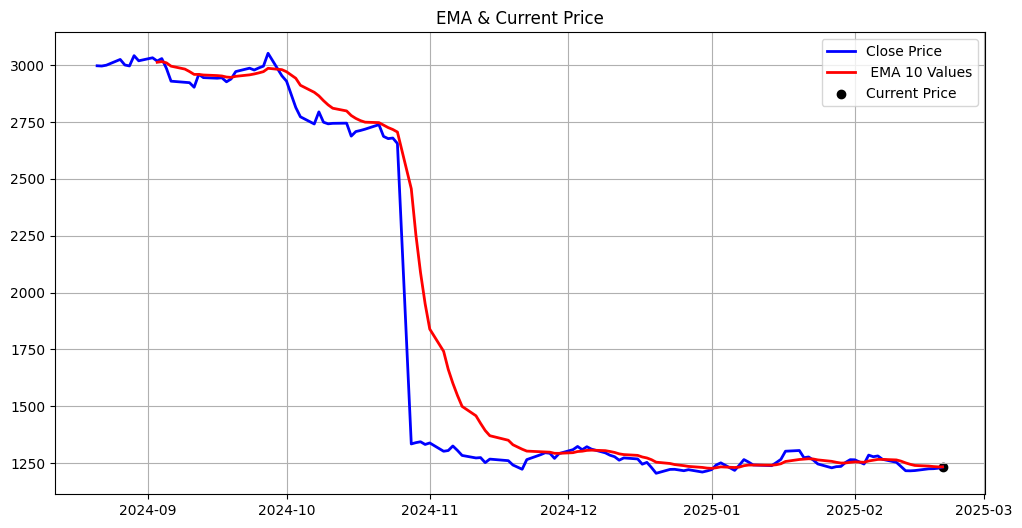

In [42]:
import pandas as pd
import talib
import numpy as np
import matplotlib.pyplot as plt


input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values
input_data["EMA_10"] = talib.EMA(close_price_data, timeperiod=10)
input_data.to_csv("EMA_10 Values.csv")

latest_ema = input_data["EMA_10"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

print("Current Price:\n",latest_close_price)
print("Total Length:\n",latest_ema)

plt.figure(figsize=(12,6))
plt.plot(input_data["Date"],input_data["Close"], label = "Close Price", color = "blue", linewidth = 2)
plt.plot(input_data["Date"],input_data["EMA_10"], label = " EMA 10 Values", color = "red", linewidth = 2)
plt.scatter(input_data["Date"].iloc[-1], input_data["Close"].iloc[-1], label = "Current Price", color = "black")
plt.xlabel = "Date"
plt.ylabel = "Price"
plt.title("EMA & Current Price")
plt.legend()
plt.grid()
plt.show()
